hello

$$ y = ax^2 + bx + c $$
$$ x^2 + y^2 = a $$

## ローパスフィルタのみ

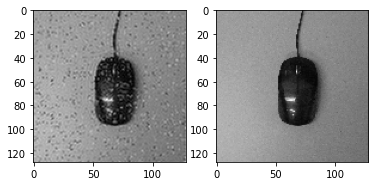

22.731333085410824
25.133078314556606
2.4017452291457815


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("1121/mouse_original.bmp", 0)
noise = cv2.imread("1121/mouse_noise.bmp", 0)

dft = cv2.dft(np.float32(noise), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = noise.shape
crow, ccol = rows // 2 , cols // 2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-45 : crow+45, ccol-45 : ccol+45] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 0~255で正規化
img_back_max = img_back.max()
img_back2 = (img_back * 255) / img_back_max
img_back2 = img_back2.astype(np.uint8)

# cv2.imwrite("img_back.bmp", img_back2)

# 画像をプロット
plt.subplot(121).imshow(img_back2, cmap="gray")
plt.subplot(122).imshow(img, cmap="gray")
plt.show()

noise_psnr = cv2.PSNR(img, noise)
imp_psnr = cv2.PSNR(img, img_back2)
print(noise_psnr)
print(imp_psnr)
print(imp_psnr-noise_psnr)

|項目|数値|
|-|-|
| 処理前 | 22.731333085410824 |
| 処理後 | 25.133078314556606 |
| 差分 | 2.4017452291457815 |

[[132.565979]]
[[40.78340413]]
